# Homework 1: Binary Classification with Logistic Regression

Ad Soyad: Önder Görmez  
Öğrenci No: 21501035

---------------------------
# Regularization Nedir?
* Regularization modelin overfitting olmaması için coefficient tahminini 0 a yakınlaştırmaktır.
* Böylelikle model overfitting nedeniyle düzgün çalışmadığı zaman, modelin karşmaşıklığını kontrol altında tutabiliriz.
* Teknik olarak regularization, overfitting i modelin loss fonksiyonuna bir penaltı değeri ekleyerek engeller.

$$
\begin {array}{|l|}
\hline
Regularization = Loss Function + Penalty \\
\hline
\end{array}
$$

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190523171704/overfitting_21.png" alt="geeksforgeeks.org">

Image Source: https://media.geeksforgeeks.org/wp-content/uploads/20190523171704/overfitting_21.png

# Logistic Regression Kısa Bilgi

* Lojistik regresyon, binary classification için oldukça yaygın kullanılan bir eğiticili öğrenme algoritmasıdır.
* Lojistik regresyon, giriş verilerini bir doğrusal regresyon modeline besler ve ardından çıktıyı bir sigmoid fonksiyonuna geçirir. Bu, çıktının 0 ile 1 arasında olmasını sağlar ve bu çıktıyı bir eşik değeriyle karşılaştırarak sınıflandırma yapılabilir.
* Bir e-mailin spam olup olmadığını belirlemek, bir kullanıcının bir ürünü satın alıp almayacağını tahmin etmek gibi binary classification problemlerinde kullanılabilir.

* Regularization modelin overfitting olmaması için coefficient tahminini 0 a yakınlaştırmaktır.
* Böylelikle model overfitting nedeniyle düzgün çalışmadığı zaman, modelin karşmaşıklığını kontrol altında tutabiliriz.
* Teknik olarak regularization, overfitting i modelin loss fonksiyonuna bir penaltı değeri ekleyerek engeller.

TODO: Aşağıyı latex e koymak ve makaleye eklemek isteyebiliriz.
$$
\begin {array}{|l|}
\hline
Regularization = Loss Function + Penalty \\
\hline
\end{array}
$$

${\gamma}$ : Regularization hiper parametresi.
* Regularizasyon un kuvvetini kontrol eder.
Büyük ${\gamma}$ daha fazla regularizasyon, modelde küçük coefficient anlamına gelir. Fakat öğrenmenin çok azalmasına (underfitting) neden olabilir.
* ${\gamma}$ sonsuza gittikçe underfitting gerçekleşir ve model mevcut datalar üzerinden öğrenme gerçekleştirememiş olur.
* Küçük ${\gamma}$ daha az regularizasyon anlamına gelmektedir. Lambda küçüldükçe modeli çok fazla öğrenme (overfitting) eğilimi artar.
* ${\gamma}$ sıfıra gittikça overfitting gerçekleşir.
* ${\gamma}$ sıfır olursa denklemler lineer regresyon denklemine dönüşür.


## Gradient
![](images/Gradient.png)

Image Source: https://web.stanford.edu/~jurafsky/slp3/5.pdf

## Hessian

![](images/Hessian.png)

Image Source: https://stats.stackexchange.com/questions/68391/hessian-of-logistic-function


# Logger Kullanımı

- Oluşturulan kod içerisinde loglama işlemleri için `logging` kütüphanesi kullanılmıştır.
- Böylelikle geliştirme aşamasında debug için koyulan kodların çıktılarına bakılarak hata ayıklama işlemleri yapılabilir. Bu kodların çıktıları rapor sunulurken kaldırılacaktır.


In [145]:
import logging
import logging.config
import yaml
import textwrap


class CustomFormatter(logging.Formatter):

    def format(self, record):
        wrapped_message = super().format(record)

        # wrap the log messages to 120 characters to better fit the screen
        if (len(wrapped_message) > 120):
            wrapped_message = "\n".join(textwrap.wrap(wrapped_message, width=120))

            # indent the wrapped lines but not the first line
            first_line, rest = wrapped_message.split('\n', 1)
            wrapped_message = first_line + '\n' + textwrap.indent(rest, ' ' * 4) + '\n'

        return wrapped_message


HOMEWORK_DIR = '/Users/ondergormez/Repos/BLM5110_Machine_Learning/02-Homeworks/Homework1/'
LOGGER_CONFIG_FILE = HOMEWORK_DIR + 'logger_config.yaml'

# Load the YAML configuration
with open('logger_config.yaml', 'r') as file:
    config = yaml.safe_load(file.read())
    logging.config.dictConfig(config)

# Apply the custom formatter to the selected handler
logger = logging.getLogger("default_logger")
for handler in logger.handlers:
    if isinstance(handler, logging.StreamHandler):
        handler.setFormatter(CustomFormatter(handler.formatter._fmt, datefmt=handler.formatter.datefmt))

# TODO: Set the log level to INFO
logger.setLevel(logging.DEBUG)


logger.debug("This is a debug message that will be wrapped after 140 characters. " * 10)
logger.info("Logging is configured successfully.")

[DEBUG] [2024-11-18T21:01:39.098Z] This is a debug message that will be wrapped after 140 characters. This is a debug
    message that will be wrapped after 140 characters. This is a debug message that will be wrapped after 140 characters.
    This is a debug message that will be wrapped after 140 characters. This is a debug message that will be wrapped after
    140 characters. This is a debug message that will be wrapped after 140 characters. This is a debug message that will be
    wrapped after 140 characters. This is a debug message that will be wrapped after 140 characters. This is a debug message
    that will be wrapped after 140 characters. This is a debug message that will be wrapped after 140 characters.

[INFO] [2024-11-18T21:01:39.099Z] Logging is configured successfully.


# Veri Setinin Yüklenmesi
- Veri seti train, test ve validation setlerine ayrılacaktır.

In [146]:
import pandas as pd

DATA_PATH = HOMEWORK_DIR + 'hw1Data.txt'
logger.info(f"Data path: {DATA_PATH}")

# load data to a pandas dataframe
# ingilizce kabul: accepted
# ingilizce reddedildi: rejected
# add exam 1, exam 2, and acceptance column names
# 0: rejected, 1: accepted
data_df = pd.read_csv(DATA_PATH, names=['exam_1_result', 'exam_2_result', 'acceptance_status'])
data_df['acceptance_status'] = data_df['acceptance_status'].map({0 : 'rejected', 1 : 'accepted'})

data_df.head()

[INFO] [2024-11-18T21:01:39.120Z] Data path:
    /Users/ondergormez/Repos/BLM5110_Machine_Learning/02-Homeworks/Homework1/hw1Data.txt



,exam_1_result,exam_2_result,acceptance_status
0,34.623660,78.024693,rejected
1,30.286711,43.894998,rejected
2,35.847409,72.902198,rejected
3,60.182599,86.308552,accepted
4,79.032736,75.344376,accepted


# Veri Setinin Dağılımı Hakkında Bilgi Edinilmesi
* Veri setindeki sınıfların dağılımı bize veri setini nasıl parçalara ayıracağımız hakkında önemli bilgiler vermektedir.
* Bu nedenle veri setini inceleyelim ve sınıfların dağılımını bar plot olarak görelim.

## Bar Plot'un Oluşturulması

* Bar plot için aşağıdaki şekilde bir fonksiyon oluşturulmuştır.

In [147]:
import matplotlib.pyplot as plt

def plot_acceptance_status_of_data(data_df, title='Distribution of Acceptance Status'):

    # Plot a histogram of the acceptance status
    value_counts = data_df['acceptance_status'].value_counts()
    logger.debug(value_counts)
    accepted_count = value_counts.get('accepted', 0)
    rejected_count = value_counts.get('rejected', 0)
    total_count = accepted_count + rejected_count
    accepted_percentage = (accepted_count / total_count) * 100
    rejected_percentage = (rejected_count / total_count) * 100
    logger.info(f"Total Count: {total_count}")
    logger.info(f"Accepted: {accepted_count}, Rejected: {rejected_count}")
    logger.info(f"Accepted Percentage: {accepted_percentage:.2f}%, Rejected Percentage: {rejected_percentage:.2f}%")

    # transform to the series of data
    status_array = [rejected_count, accepted_count]
    value_labels = ['rejected', 'accepted']
    colors = ['red', 'green']  # Colors for rejected and accepted

    # Create a bar plot
    plt.figure(figsize=(5, 7))
    bars = plt.bar(range(len(status_array)), status_array, color=colors)

    # Add value over the bars
    for bar in bars:
        status_count = bar.get_height()

        # ha: horizontal alignment
        text_x_location = bar.get_x() + bar.get_width() / 2.0
        text_y_location = status_count + 1

        plt.text(text_x_location, text_y_location, status_count, ha='center')

    # Add titles and labels
    plt.title(title)
    # add acceptance status to the x-axis
    plt.xticks(range(len(status_array)), value_labels)
    plt.xlabel('Acceptance Status')
    plt.ylabel('Count')

    # Show the plot
    plt.show()

## Tüm Veri Seti İçin Bar Plot Çizdirilmesi

* Tüm veri seti çizdirildiğinde sınıflardan kabul edilenlerde 60, reddedilenlerde 40 tane örnek olduğu gözlemlenir.


[DEBUG] [2024-11-18T21:01:39.139Z] acceptance_status
accepted    60
rejected    40
Name: count, dtype: int64
[INFO] [2024-11-18T21:01:39.140Z] Total Count: 100
[INFO] [2024-11-18T21:01:39.140Z] Accepted: 60, Rejected: 40
[INFO] [2024-11-18T21:01:39.140Z] Accepted Percentage: 60.00%, Rejected Percentage: 40.00%


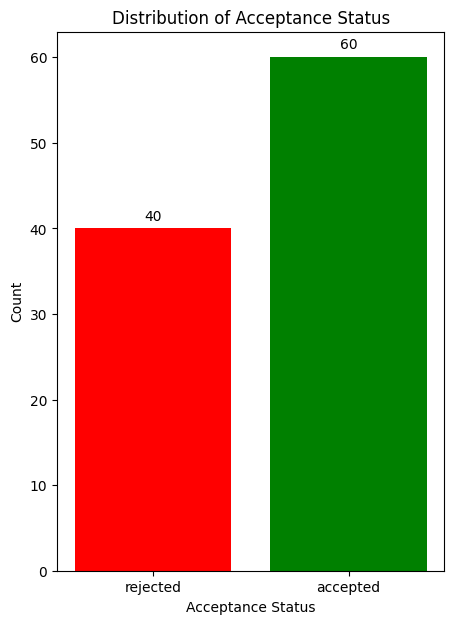

In [148]:
plot_acceptance_status_of_data(data_df)

# Örneklerin 2 Sınıfa Dağılımı
* Önce örneklerin iki sınıfa dağılımını görmek için x eksenini 1. sınav notu, y eksenini 2. sınav notu için kullanarak ve iki sınıfa ait örnekleri iki farklı renk ile göstererek örnekleri çizdiriniz.

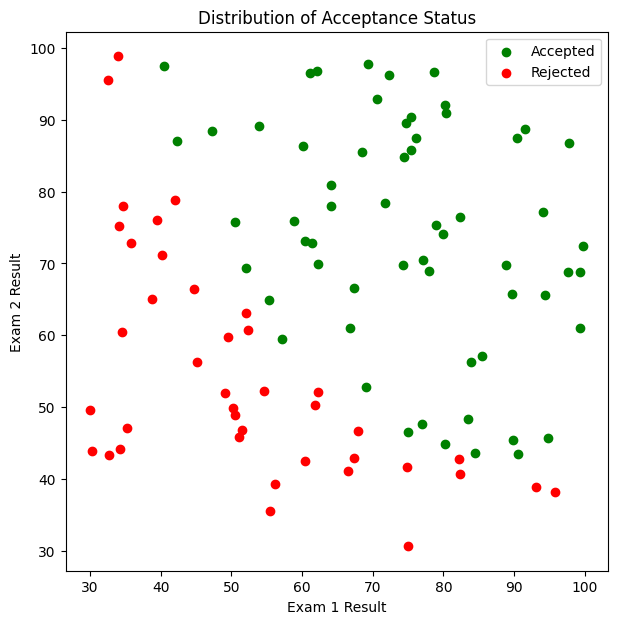

In [149]:
# Önce örneklerin iki sınıfa dağılımını görmek için x eksenini 1. sınav notu, y eksenini 2. sınav notu için kullanarak ve iki sınıfa ait örnekleri iki farklı renk ile göstererek örnekleri çizdiriniz.

def plot_distribution_of_data(data_df, title='Distribution of Acceptance Status'):
    # Create a scatter plot
    plt.figure(figsize=(7, 7))
    plt.scatter(data_df[data_df['acceptance_status'] == 'accepted']['exam_1_result'],
                data_df[data_df['acceptance_status'] == 'accepted']['exam_2_result'],
                color='green', label='Accepted')

    plt.scatter(data_df[data_df['acceptance_status'] == 'rejected']['exam_1_result'],
                data_df[data_df['acceptance_status'] == 'rejected']['exam_2_result'],
                color='red', label='Rejected')

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Exam 1 Result')
    plt.ylabel('Exam 2 Result')
    plt.legend()

    # Show the plot
    plt.show()


plot_distribution_of_data(data_df)

Yukarıdaki **çizimi yorumlamak** gerekirse;
* Herhangi **bir sınavdan çok yüksek almak** başarılı olmayı **garanti etmez**. 1 sınavdan çok iyi not alıyorsanız diğer sınavdan en az 40-45 almanız lazım ki başarılı olasınız.
* **2 sınavdan da 70 in üzerinde** not alırsanız **başarılı olma ihtimaliniz çok yüksektir**.

# Train, Validation ve Test Set lerinin Oluşturulması

* Yukarıda görüldüğü gibi veri seti evenly distributed değil.
* Bu nedenle veri setini train, validation ve test setlerine ayırırken stratify yaparak sınıfların dağılımını koruyacağız.
* Bunun için ilk önce tüm veri setini rejected ve accepted olarak ikiye ayıracağız.
* Sonrasında bu iki veri setini train, validation ve test setlerine ayıracağız.


In [150]:
from sklearn.model_selection import train_test_split

# split the data features and target
X = data_df[['exam_1_result', 'exam_2_result']] # features
y = data_df['acceptance_status'] # target

# %80 train, %20 test olarak ayrılıyor
# stratify=y: y'yi dengeli bir şekilde bölmek için kullanılır. Veri seti bölünmeden önceki sınıf dağılımını korur.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train setinin %25'i validation set olarak ayrılır
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

logger.info(f"Train set size: {len(X_train)}")
logger.info(f"Validation set size: {len(X_val)}")
logger.info(f"Test set size: {len(X_test)}")

[INFO] [2024-11-18T21:01:39.260Z] Train set size: 60
[INFO] [2024-11-18T21:01:39.261Z] Validation set size: 20
[INFO] [2024-11-18T21:01:39.261Z] Test set size: 20


* Veriyi görselleştirebilmek için data frame lere koyalım.
* Notların dağılımı ve başarılı olup olmama durumunu görselleştirelim.

[DEBUG] [2024-11-18T21:01:39.265Z] acceptance_status
accepted    36
rejected    24
Name: count, dtype: int64
[INFO] [2024-11-18T21:01:39.266Z] Total Count: 60
[INFO] [2024-11-18T21:01:39.266Z] Accepted: 36, Rejected: 24
[INFO] [2024-11-18T21:01:39.266Z] Accepted Percentage: 60.00%, Rejected Percentage: 40.00%


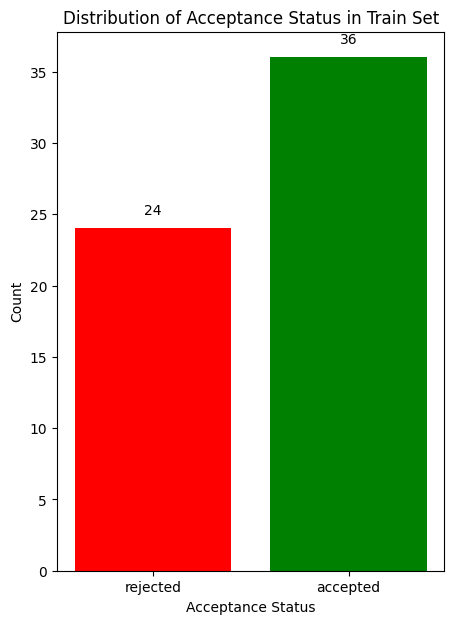

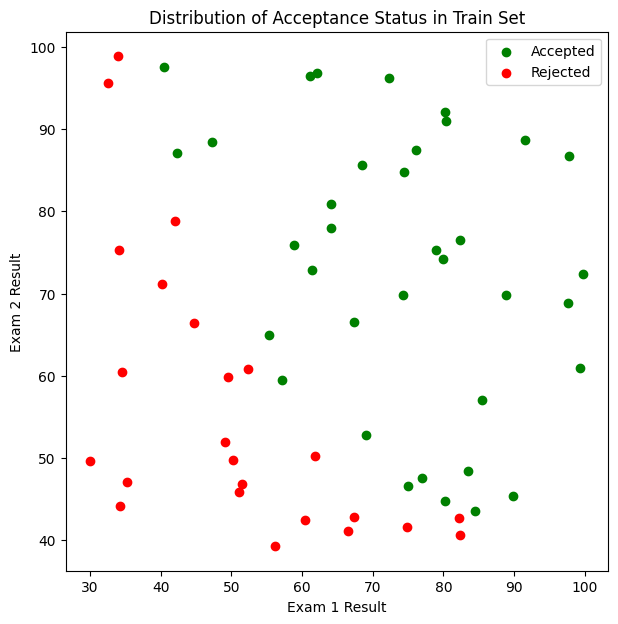

In [151]:
train_df = pd.concat([X_train, y_train], axis=1)

plot_acceptance_status_of_data(train_df, title='Distribution of Acceptance Status in Train Set')
plot_distribution_of_data(train_df, title='Distribution of Acceptance Status in Train Set')

[DEBUG] [2024-11-18T21:01:39.378Z] acceptance_status
accepted    12
rejected     8
Name: count, dtype: int64
[INFO] [2024-11-18T21:01:39.379Z] Total Count: 20
[INFO] [2024-11-18T21:01:39.379Z] Accepted: 12, Rejected: 8
[INFO] [2024-11-18T21:01:39.380Z] Accepted Percentage: 60.00%, Rejected Percentage: 40.00%


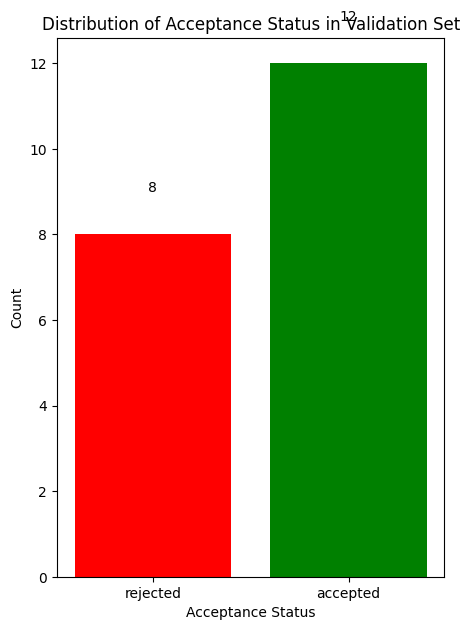

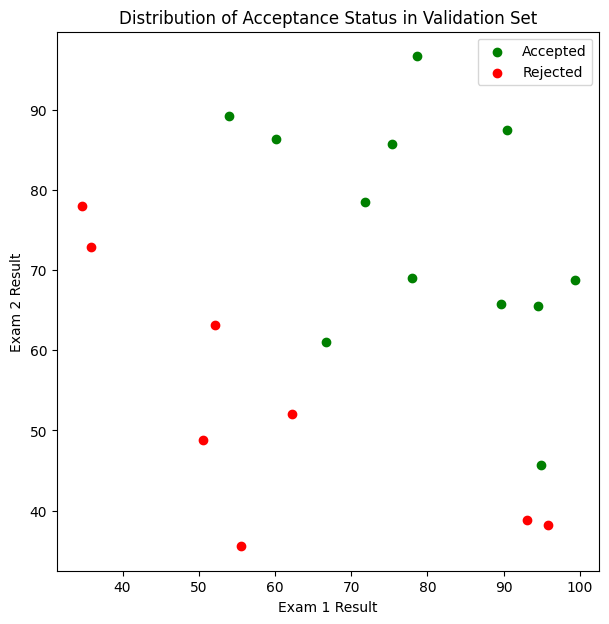

In [152]:
val_df = pd.concat([X_val, y_val], axis=1)

plot_acceptance_status_of_data(val_df, title='Distribution of Acceptance Status in Validation Set')
plot_distribution_of_data(val_df, title='Distribution of Acceptance Status in Validation Set')

[DEBUG] [2024-11-18T21:01:39.491Z] acceptance_status
accepted    12
rejected     8
Name: count, dtype: int64
[INFO] [2024-11-18T21:01:39.492Z] Total Count: 20
[INFO] [2024-11-18T21:01:39.492Z] Accepted: 12, Rejected: 8
[INFO] [2024-11-18T21:01:39.492Z] Accepted Percentage: 60.00%, Rejected Percentage: 40.00%


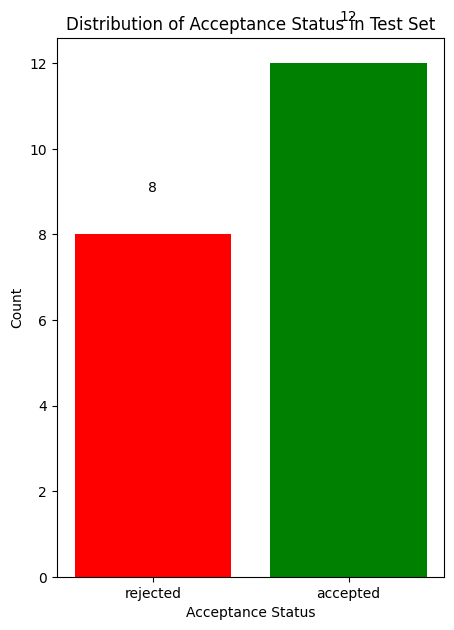

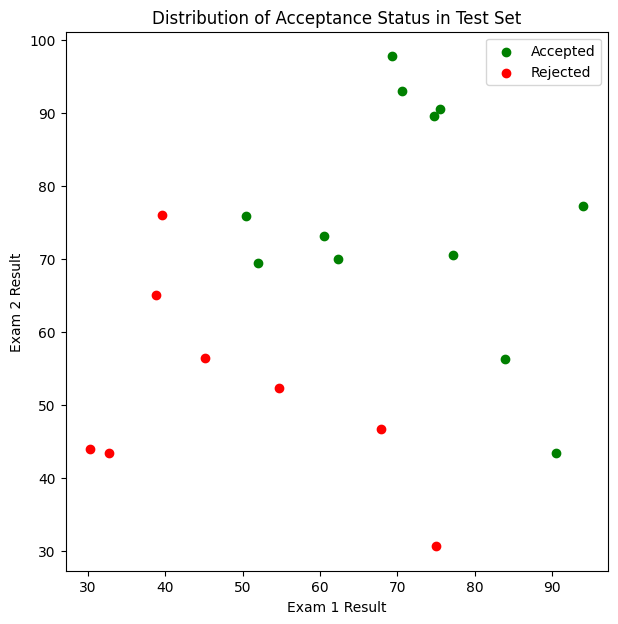

In [153]:
test_df = pd.concat([X_test, y_test], axis=1)

plot_acceptance_status_of_data(test_df, title='Distribution of Acceptance Status in Test Set')
plot_distribution_of_data(test_df, title='Distribution of Acceptance Status in Test Set')

# Metriklerin Hesaplanması

Modelin başarısının ölçümlenebilmesi için aşağıdaki metrikler kullanılacaktır.

## Accuracy

$$ \begin{equation} Accuracy = \frac{TP+TN}{TP+TN+FP+FN}\end{equation} $$

## Precision

$$ \begin{equation} Precision = \frac{TP}{TP+FP}\end{equation}  $$

## Recall

$$ \begin{equation} Recall = \frac{TP}{TP+FN}\end{equation}  $$

## F1 Score

$$ \begin{equation} F1 = \frac{2*Precision*Recall}{Precision+Recall}\end{equation}  $$

Metrikleri hesaplayarak tablo haline getirmek için aşağıdaki fonksiyon yazılmıştır.

In [154]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics_and_return_df(data_label, y_true, y_pred):

    # Calculate the metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='accepted')
    recall = recall_score(y_true, y_pred, pos_label='accepted')
    f_1_score = f1_score(y_true, y_pred, pos_label='accepted')

    # limit decimal point to 3 like 0.368 in accuracy, precision, recall, and f1 score
    accuracy = f"{accuracy:.3f}"
    precision = f"{precision:.3f}"
    recall = f"{recall:.3f}"
    f_1_score = f"{f_1_score:.3f}"

    # Create a DataFrame
    metrics_df = pd.DataFrame({
        'Data': [data_label],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f_1_score]
    })

    print()
    
    return metrics_df

# Logistic Regression Modeli

## Sigmoid Aktivasyon Fonksiyonu

* Sigmoid fonksiyonu, giriş değerini 0 ile 1 arasında bir değere dönüştüren bir aktivasyon fonksiyonudur.

$$ S(x) = \frac{1} {1 + e^{-x}} $$

Aşağıda sigmoid fonksiyonunun nasıl oluşturulacağı gösterilmiştir.

* Hangi değeri verirseniz verin, çıktı değeri her zaman 0 ile 1 arasında olacaktır.
* TODO: Aşağıda yazanı doğrula.
* Regresyon modelimizi oluştururken, çıktı değerini sigmoid fonksiyonundan geçirerek 0 ile 1 arasında bir değer elde ederiz.

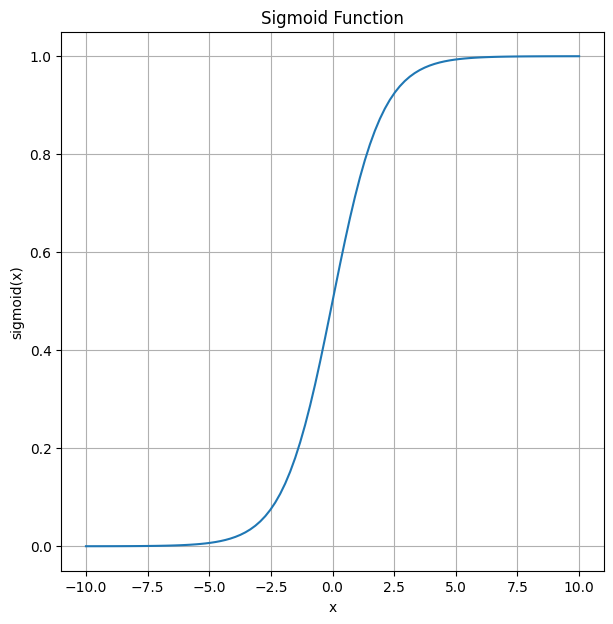

In [155]:
# our logistic regression implementation
from logistic_regression import MyLogisticRegression

MyLogisticRegression.plot_sigmoid_function()

## Cross Entropy Loss Fonksiyonu

* Cross Entropy Loss fonksiyonu, sınıflandırma modellerinin tahminlerinin doğruluğunu ölçen bir loss fonksiyonudur.
* Log loss olarak da bilinir.
* Çıkışı 0 ile 1 arasında olan modeller için kullanılır.
* Tahmin edilen olasılık değeri, gerçek etiket değerine ne kadar yakınsa, loss değeri o kadar düşük olur.
* Tam tersi, tahmin edilen olasılık değeri, gerçek etiket değerine ne kadar uzaksa, loss değeri o kadar yüksek olur.
* Formülü aşağıdaki gibidir.

$$ CEL = -{(y_{true}\log(y_{predicted}) + (1 - y_{true})\log(1 - y_{predicted}))} $$

* Kodunu aşağıdaki şekilde yazabiliriz.

In [165]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# accepted ve rejected sınıflarını 1 ve 0'a dönüştür
# Create a label encoder
label_encoder = LabelEncoder()
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Standardize the features
# Z-Score standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

my_logistic_regression_model = MyLogisticRegression(learning_rate=0.0001, n_of_iterations=1000)
my_logistic_regression_model.fit(X_train_scaled, y_train_encoded)

y_train_pred_encoded = my_logistic_regression_model.predict(X_train_scaled)
y_validation_pred_encoded = my_logistic_regression_model.predict(X_val_scaled)
y_test_pred_encoded = my_logistic_regression_model.predict(X_test_scaled)


# Convert to original class labels
y_train_pred = label_encoder.inverse_transform(y_train_pred_encoded)
y_validation_pred = label_encoder.inverse_transform(y_validation_pred_encoded)
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)

train_metrics_df = calculate_metrics_and_return_df('Train', y_train, y_train_pred)
val_metrics_df = calculate_metrics_and_return_df('Validation', y_val, y_validation_pred)
test_metrics_df = calculate_metrics_and_return_df('Test', y_test, y_test_pred)

all_metrics_df = pd.concat([train_metrics_df, val_metrics_df, test_metrics_df])
display(all_metrics_df)

,Data,Accuracy,Precision,Recall,F1 Score
0,Train,0.900,0.917,0.917,0.917
0,Validation,0.900,0.857,1.000,0.923
0,Test,0.900,1.000,0.833,0.909


# Sample ile Loss İlişkisinin Çizdirilmesi

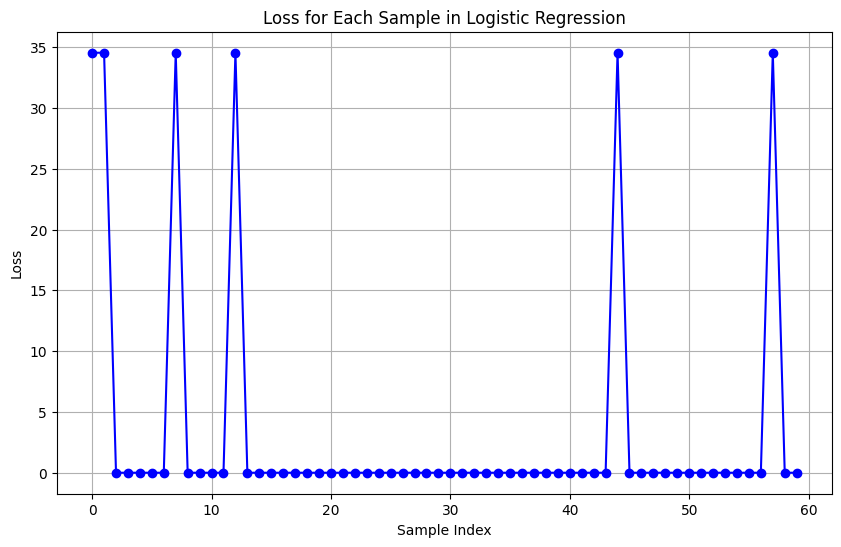

In [157]:
# Calculate the loss for each sample
losses = MyLogisticRegression.calculate_cross_entropy_loss(y_train_encoded, y_train_pred_encoded)

losses = []
for i in range(len(y_train_encoded)):
    loss = MyLogisticRegression.calculate_cross_entropy_loss(y_train_encoded[i], y_train_pred_encoded[i])
    losses.append(loss)

plt.figure(figsize=(10, 6))
plt.plot(losses, marker='o', linestyle='-', color='b')
plt.title('Loss for Each Sample in Logistic Regression')
plt.xlabel('Sample Index')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Training ve Validation Loss'un Çizdirilmesi

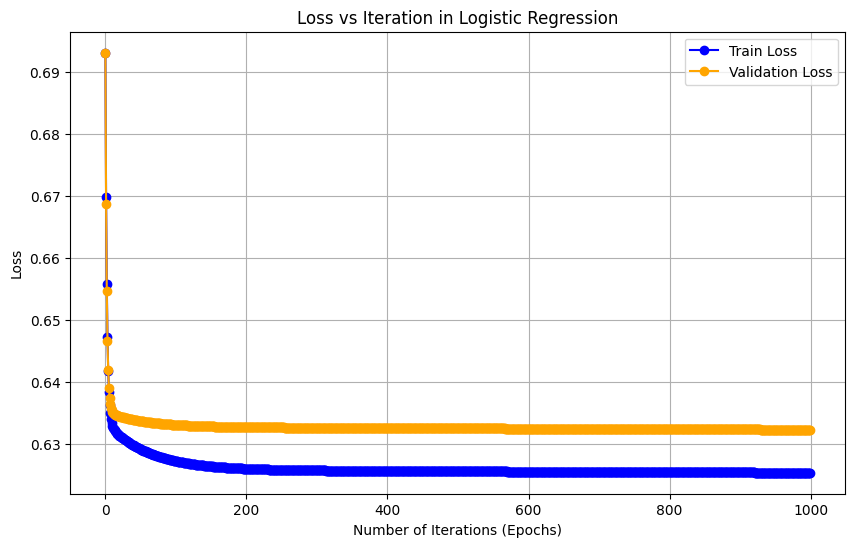

In [163]:
# Loss değerlerini alabilmek için train ve validation set ile modelin fit edilmesi gerekmektedir.
my_logistic_regression_model = MyLogisticRegression(learning_rate=0.0001, n_of_iterations=1000)
my_logistic_regression_model.fit(X_train, y_train_encoded)
train_lossses = my_logistic_regression_model.get_losses()

my_logistic_regression_model = MyLogisticRegression(learning_rate=0.0001, n_of_iterations=1000)
my_logistic_regression_model.fit(X_val, y_val_encoded)
validation_lossses = my_logistic_regression_model.get_losses()


plt.figure(figsize=(10, 6))
plt.plot(train_lossses, marker='o', linestyle='-', color='blue', label='Train Loss')
plt.plot(validation_lossses, marker='o', linestyle='-', color='orange', label='Validation Loss')
plt.title('Loss vs Iteration in Logistic Regression')
plt.xlabel('Number of Iterations (Epochs)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Test Datası Üzerinden Confision Matrix Oluşturulması

In [159]:
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10  2]
 [ 0  8]]


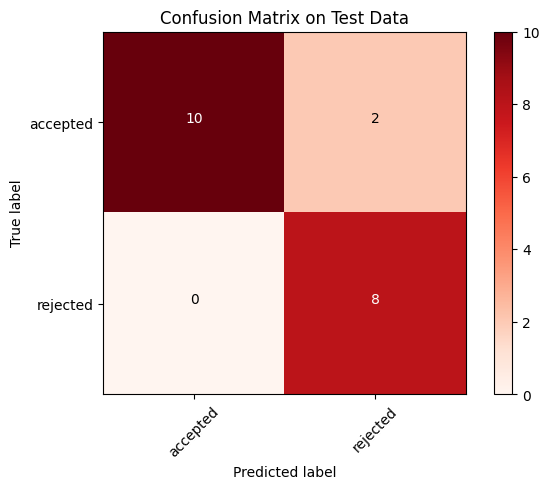

In [160]:
import numpy as np
from sklearn.metrics import confusion_matrix

# predictions = model.predict(test_batches)
# predictions_max = np.argmax(predictions, axis=-1)

cm = confusion_matrix(y_test, y_pred=y_test_pred)
plot_confusion_matrix(cm, classes=['accepted', 'rejected'], title='Confusion Matrix on Test Data')

## Standart Fonksiyon Kullanarak Logistic Regression Modeli Oluşturulması
Bu kısmı oluşturduğumuz modeli karşılaştırmak için kullanacağız.

In [168]:
# SGDRegressor is used to perform linear regression with stochastic gradient descent.
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the features
# Z-Score standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
sgd_classifier = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Train the model
sgd_classifier.fit(X_train_scaled, y_train)

# Predict the train, validation, and test sets and show the metrics
y_train_sgd_pred = sgd_classifier.predict(X_train_scaled)
y_val_sgd_pred = sgd_classifier.predict(X_val_scaled)
y_test_sgd_pred = sgd_classifier.predict(X_test_scaled)

sgd_train_metrics = calculate_metrics_and_return_df('Train', y_train, y_train_sgd_pred)
sgd_validation_metrics = calculate_metrics_and_return_df('Validation', y_val, y_val_sgd_pred)
sgd_test_metrics = calculate_metrics_and_return_df('Test', y_test, y_test_pred)

sgd_all_metrics_df = pd.concat([sgd_train_metrics, sgd_validation_metrics, sgd_test_metrics])
display(sgd_all_metrics_df)

,Data,Accuracy,Precision,Recall,F1 Score
0,Train,0.867,0.938,0.833,0.882
0,Validation,0.900,0.857,1.000,0.923
0,Test,0.900,1.000,0.833,0.909


# Rerefences

* https://blmoistawinde.github.io/ml_equations_latex/
* https://medium.com/@koushikkushal95/logistic-regression-from-scratch-dfb8527a4226